In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

## Intro
This dataset uses the Iris datset in which three different species of iris flowers exist, and the problem is to classify them into their respective species.  

Use the `ml` conda environment when running all analyses.

In [2]:
iris_dataset = load_iris()

The `iris_dataset` is held in a Bunch object which is similar to a dictionary in that it contains keys and values.

In [5]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The target names value is an array of strings containing the three species of plant into which the flowers should be categorized.

In [10]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


The feature names is a list of strings containing a description of each of the features.

In [11]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data is held in a numpy array of 150 flower (sample) measurements and 4 different features.

In [13]:
print(iris_dataset['data'].shape)

(150, 4)


Here are the first five rows of data.

In [14]:
print(iris_dataset['data'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


The target array contains the species of each flower as integers from 0 to 2 in the order defined in the `target_names`.

In [15]:
print(iris_dataset['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


If a subset of the same data is used to test the accuracy of a prediction algorithm created from the original data, the samples will match their original selves and be classified as such. So, new samples must be used when testing the accuracy of how well the model will generalize.  

To do achieve this, a part of the original data can be held from the prediction algorithm and used as the test data. `scikit-learn` has a `train_test_split` function that will extract 75% of the rows to use to build the algorithm.  

In scikit-learn , data is usually denoted with a capital X , while labels are denoted by a lowercase y . This is inspired by the standard formulation f(x)=y in mathematics, where x is the input to a function and y is the output. Following more conventions from mathematics, we use a capital X because the data is a two-dimensional array (a matrix) and a lowercase y because the target is a one-dimensional array (a vector).  

Because the order of the samples are randomized in order to separate the 75% from the 25%, the `random_state` parameter will allow a seed to be specified so the result is repeatable.

In [27]:

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
print(X_train[:5], y_train[:5])

[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]] [1 1 2 0 2]


It is often beneficial to manually inspect the data before analyzing it to see if everything looks okay.  

A pair plot can be a helpful way of plotting each of the features against each other to see initial patterns and make sure the data conforms well to expectations.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6270fb4ac8>,
      dtype=object)

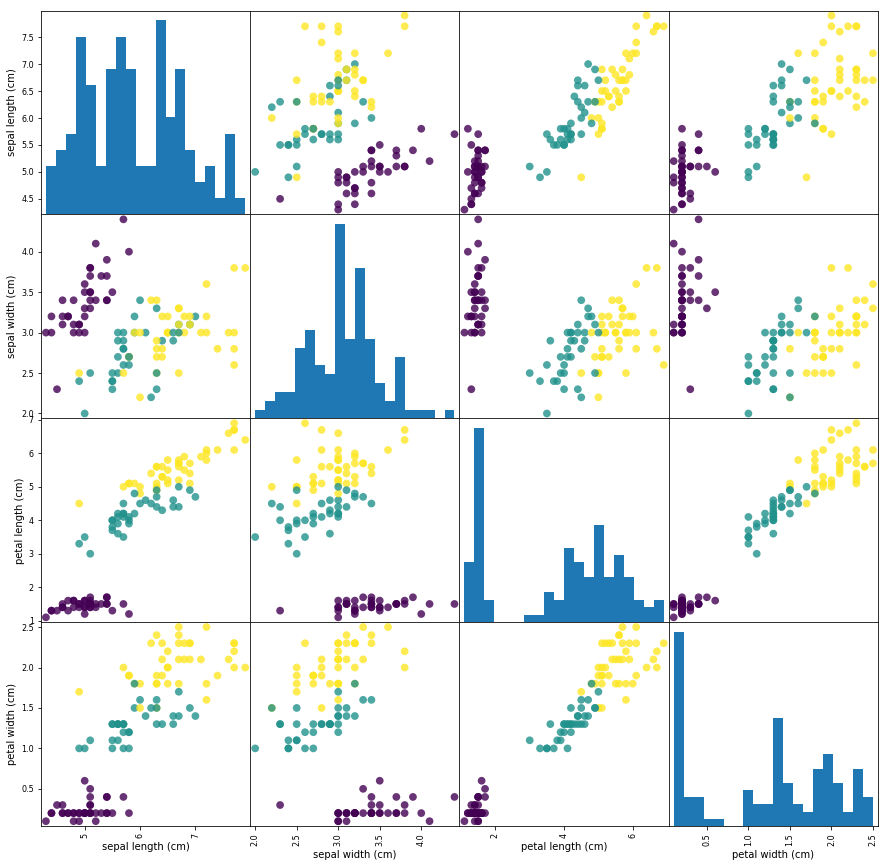

In [34]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

In the plots it can clearly be seen that the three different species cluster differently, meaning that the machine learning model will likely be able to separate them.

The first model here is called k-Nearest Neighbors which is relatively simple in that in order to make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point and assigns the new point the same label. The 'k' in k-nearest neighbors signifies that any number of nearest neighbors can be used to classify a new point, though to start we will just use the nearest neighbor.  

All machine learning models in scikit-learn are implemented in their own 'Estimator' classes. The k-nearest neighbor algorithm is impolemented in an instance of the `KNeighborsClassifier`. This object instance will be used to build the model, make new predictions, and hold the information extracted from the training data.

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)

Here the model is built on the training set. the fit method returns the knn object and modifies it in place. The displayed representation of the model shows the parameters that were used in training the model.

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

Now predictions can be made using the knn model.

In [40]:
X_new = np.array([[5, 2.9, 1, 0.2]])

Predictions are made using the predict method of the kdd object.

In [48]:
prediction = knn.predict(X_new)
print(prediction[0])
print(iris_dataset['target_names'][prediction])

0
['setosa']


The trouble with just making predictions is that it is unknown how accurate the model is. By comparing the test dataset to the model, an accuracy can be computed as the fraction of flowers for which the correct species is predicted.

In [52]:
y_pred = knn.predict(X_test)
print(y_pred)
print(np.mean(y_pred == y_test))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
0.9736842105263158


The above calculation of accuracy can also be computed with the `score` method of the `knn` object.

In [53]:
print(knn.score(X_test, y_test))

0.9736842105263158


An accuracy of 97% means that any new measurements can be expected to be classfied 97% correctly.